In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [13]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Read the CSV and Perform Basic Data Cleaning

In [14]:
# Read Allergy file
file = 'C:/Users/tearo/Desktop/csci 5707 project/merged_file.csv'

In [15]:

df_cereal = pd.read_csv(file, encoding="UTF8")
df_cereal.head()

,allergyname,ingredientid,allergytype,foodgroup,foodorigin,manufacturerid,manufacturername,ingredientname,upc,rank,cerealtname,description,nutrientid,nutrientname,nutrientamount
0,Sugar Allergy / Intolerance,97,Vegetable,Sugar source,Plant origin,1,"General Mills, Inc.",FRUCTOSE,16000161795,10,Cocoa Puffs,COCOA PUFFS,1,fat,1.5
1,Sugar Allergy / Intolerance,97,Vegetable,Sugar source,Plant origin,1,"General Mills, Inc.",FRUCTOSE,16000161795,10,Cocoa Puffs,COCOA PUFFS,2,saturatedFat,0.0
2,Sugar Allergy / Intolerance,97,Vegetable,Sugar source,Plant origin,1,"General Mills, Inc.",FRUCTOSE,16000161795,10,Cocoa Puffs,COCOA PUFFS,3,transFat,0.0
3,Sugar Allergy / Intolerance,97,Vegetable,Sugar source,Plant origin,1,"General Mills, Inc.",FRUCTOSE,16000161795,10,Cocoa Puffs,COCOA PUFFS,4,cholesterol,0.0
4,Sugar Allergy / Intolerance,97,Vegetable,Sugar source,Plant origin,1,"General Mills, Inc.",FRUCTOSE,16000161795,10,Cocoa Puffs,COCOA PUFFS,5,sodium,150.0


In [18]:
columns = [
    "allergyname",
    "ingredientid",
    "allergytype",
    "foodgroup",
    "foodorigin",
    "manufacturerid",
    "manufacturername",
    "ingredientname",
    "upc",
    "cerealtname",
    "description",
    "nutrientid",
    "nutrientname",
    "nutrientamount",
    "rank"]

target = ["rank"]

# Split the Data into Training and Testing

In [19]:
# Create our features
X = df_cereal.drop(columns='rank')
X = pd.get_dummies(X)
# Create our target
y = df_cereal.loc[:, target].copy()


In [20]:
X.describe()

,ingredientid,manufacturerid,upc,nutrientid,nutrientamount,allergyname_Gluten Allergy,allergyname_Honey Allergy,allergyname_Milk allergy / Lactose intolerance,allergyname_Rice Allergy,allergyname_Sugar Allergy / Intolerance,...,nutrientname_cholesterol,nutrientname_fat,nutrientname_fiber,nutrientname_iron,nutrientname_potassium,nutrientname_protein,nutrientname_saturatedFat,nutrientname_sodium,nutrientname_sugars,nutrientname_transFat
count,11695.000000,11695.000000,1.169500e+04,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,...,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000
mean,65.828901,3.111672,1.407639e+11,7.206670,45.262284,0.002309,0.008123,0.001197,0.006841,0.002223,...,0.074733,0.074733,0.074733,0.074733,0.072339,0.074733,0.074733,0.074733,0.074733,0.074733
std,63.189253,2.423732,2.928079e+11,3.878912,86.236621,0.047995,0.089765,0.034580,0.082428,0.047100,...,0.262971,0.262971,0.262971,0.262971,0.259059,0.262971,0.262971,0.262971,0.262971,0.262971
min,1.000000,1.000000,3.000001e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,1.600028e+10,4.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,2.000000,3.000006e+10,7.000000,4.980000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,99.000000,6.000000,3.800020e+10,11.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,244.000000,10.000000,8.849123e+11,14.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Check the balance of our target values
y['rank'].value_counts()

1     684
2     670
5     657
4     657
6     657
3     657
7     617
8     617
9     589
10    563
11    563
12    535
13    509
15    495
14    495
16    414
17    401
18    333
19    266
20    240
21    226
22    200
23    147
24    107
26     80
25     80
28     53
27     53
29     39
30     39
31     26
32     26
Name: rank, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble AdaBoost classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [34]:
# Resample the training data with the BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=3,random_state=42) 
rf_model = rf_model.fit(X_train_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)

In [35]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.9066347469220246


In [36]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)


[[181   0   0 ...   0   0   0]
 [  0 187   1 ...   0   0   0]
 [  0   1 174 ...   0   0   0]
 ...
 [  0   0   0 ...  10   0   0]
 [  0   0   0 ...   0   4   0]
 [  0   0   0 ...   0   0   5]]


In [37]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.95      1.00      1.00      0.97      1.00      1.00       181
          2       0.94      0.98      1.00      0.96      0.99      0.97       191
          3       0.91      0.98      0.99      0.94      0.99      0.97       178
          4       0.89      0.94      0.99      0.91      0.96      0.92       154
          5       0.90      0.97      0.99      0.93      0.98      0.96       174
          6       0.85      0.92      0.99      0.89      0.95      0.90       176
          7       0.81      0.89      0.99      0.84      0.94      0.87       141
          8       0.91      0.89      1.00      0.90      0.94      0.87       148
          9       0.88      0.88      0.99      0.88      0.94      0.87       143
         10       0.88      0.88      0.99      0.88      0.94      0.87       121
         11       0.89      0.92      0.99      0.90      0.95      0.90       130
   

In [38]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_

sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.091423695165791, 'ingredientid'),
 (0.04462160263627881, 'upc'),
 (0.019734772845873917, 'nutrientamount'),
 (0.017283006384247707, 'manufacturerid'),
 (0.011235460554195234, 'nutrientid'),
 (0.010997852508534897, 'cerealtname_Basic 4'),
 (0.01040375827148217, 'description_CEREAL'),
 (0.010022219174342662, 'cerealtname_Froot Loops'),
 (0.009184851382868422, 'cerealtname_Cocoa Puffs'),
 (0.008680787058330338,
  'description_CHOCOLATEY CEREAL WITH MONSTER MARSHMALLOWS, CHOCOLATEY'),
 (0.00823819658852164, 'ingredientname_VITAMIN B6 (PYRIDOXINE HYDROCHLORIDE)'),
 (0.007924583450069063, 'cerealtname_Trix'),
 (0.007849013518945082, 'description_Raisin Nut Bran Cereal'),
 (0.007699678635415799,
  'description_FROSTED TOASTED OAT CEREAL WITH MARSHMALLOWS'),
 (0.007562611811675987, "cerealtname_Cracklin' Oat Bran"),
 (0.007300339100175346, 'cerealtname_Golden Grahams'),
 (0.007237393970390035,
  'description_TOASTED 100% WHOLE WHEAT FLAKES, TOASTED'),
 (0.006811591656733561, 'cerealtname_L

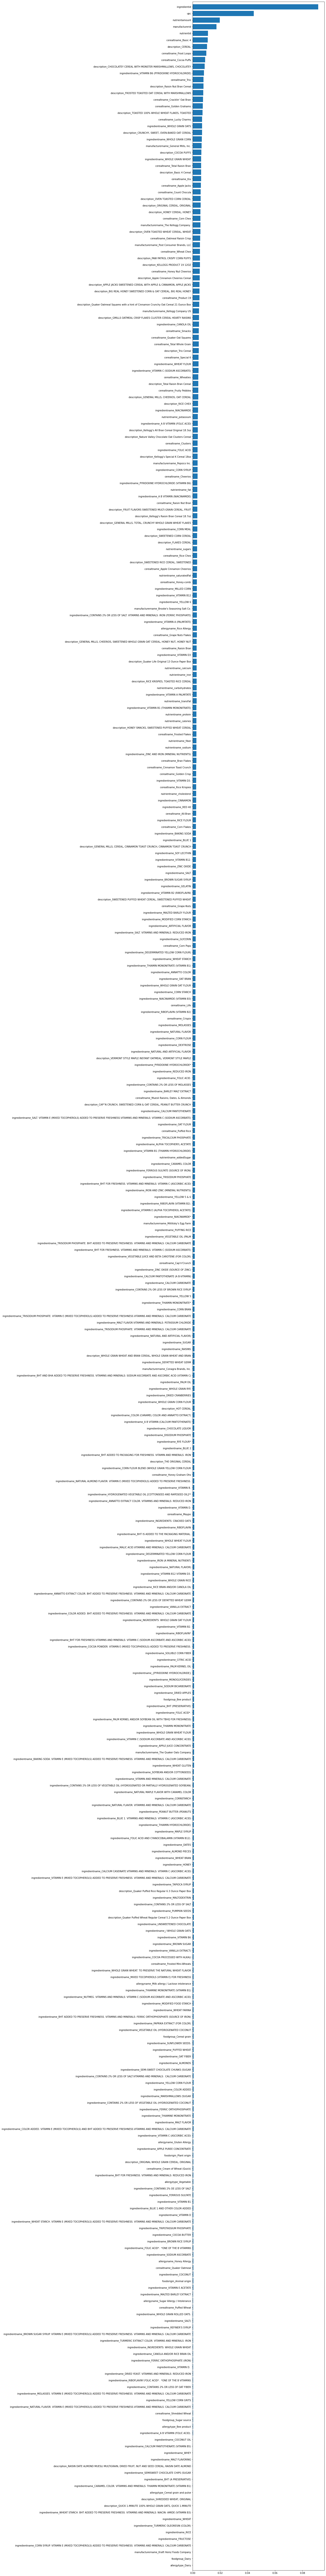

In [39]:
# List the features sorted in descending order by feature importance
from matplotlib import pyplot as plt
feature_importances = rf_model.feature_importances_
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()